# Tarefa: Classificar Homer e Bart com rede neural densa

Nas primeiras aulas sobre as redes neurais convolucionais eu mostrei uma forma que pode ser utilizada para a classificação de imagens, que é:

- Analisar as principais características de cada classe, construir um extrator de características, executar esse extrator em cada imagem e por fim, construir uma base de dados utilizando essas características

Para revisar esse processo, considere a imagem abaixo na qual escolhemos três características para o Bart e três características para o Homer (somente relacionadas a cores)

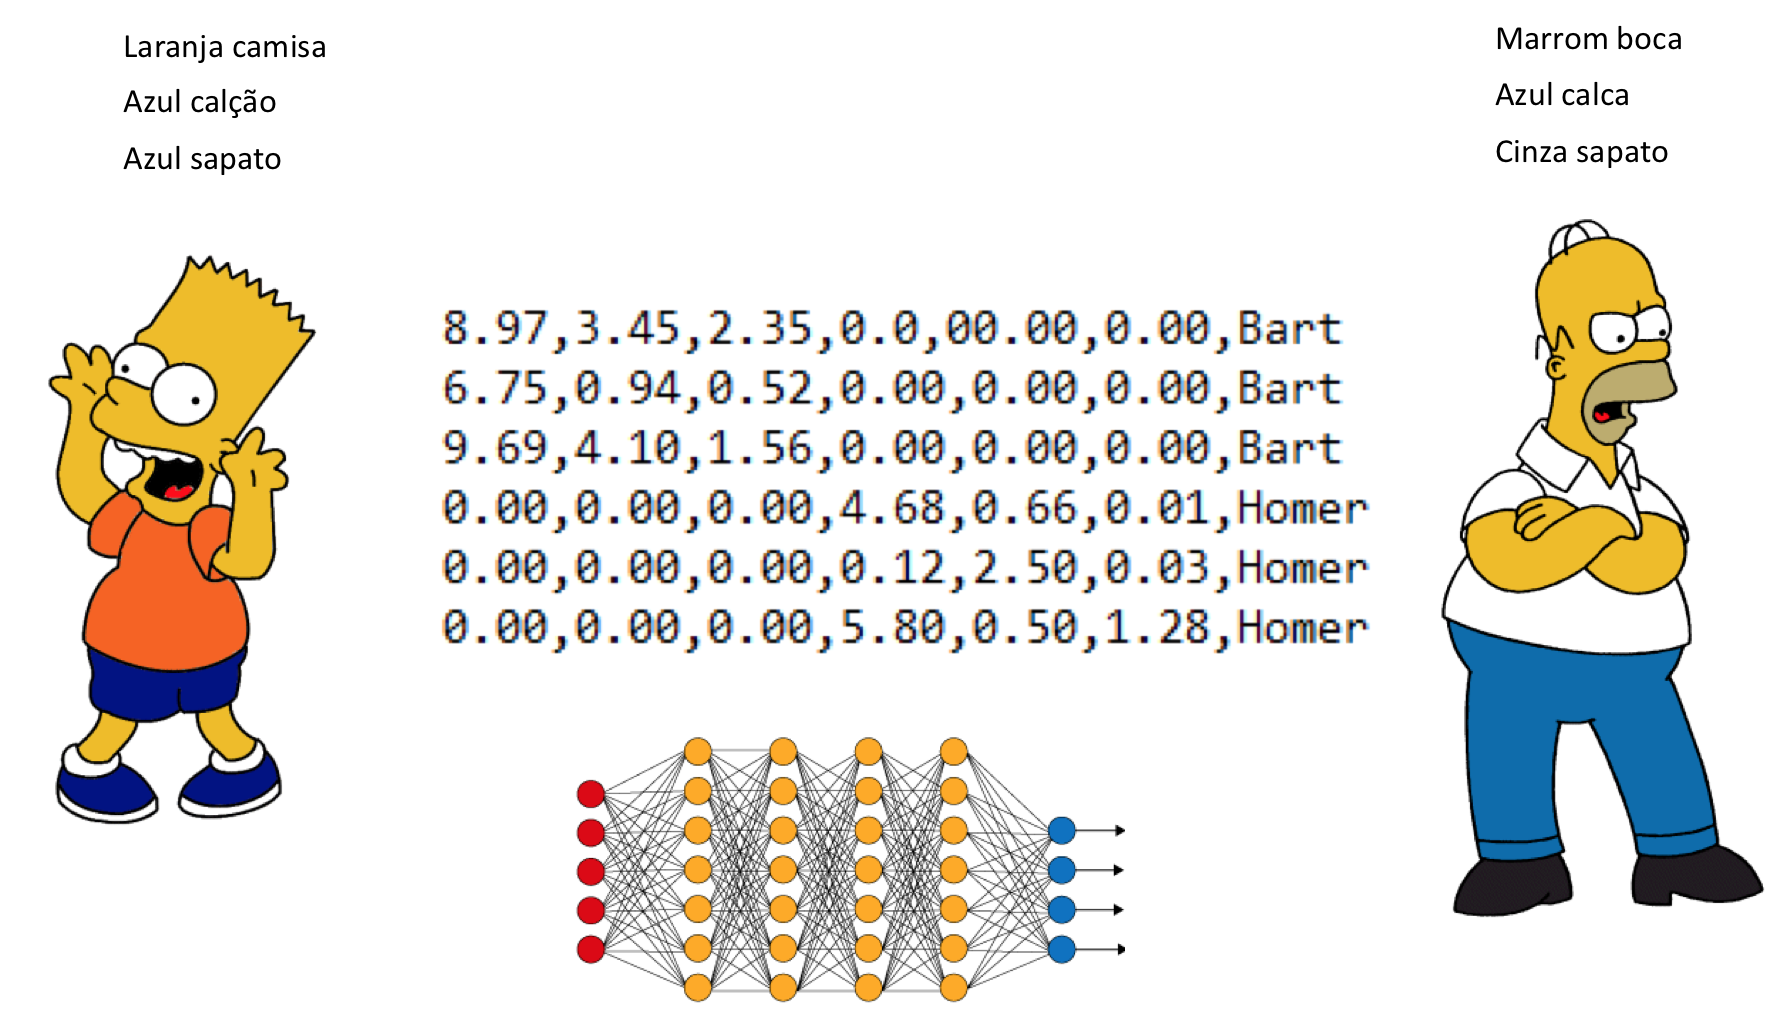

Conforme eu comentei nas aulas teóricas, no meu outro curso (Machine Learning e Data Science com Weka e Java) nós desenvolvemos este extrator de características e fizemos a geração da base de dados, a qual você utilizará nesta tarefa para a construção da rede neural densa (arquivo personagens.csv). Siga as seguintes instruções:

- Caso não lembre esses processos, sugiro que você assista novamente a primeira aula sobre as redes neurais convolucionais

- Nesta tarefa você NÃO deve construir uma rede neural convolucional, mas sim uma rede neural densa simples. A ideia é primeiro fazer experimentos com com essa técnica de extração de características para depois construirmos a rede neural convolucional e compararmos os resultados

- No arquivo personagens.csv temos 293 registros (imagens), 169 da classe Homer e 124 da classe Bart. Para fazer os experimentos você deve utilizar 75% da base para treinamento e 25% para teste, utilizando a função train_test_split para divisão da base de dados

In [1]:
!pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 16kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [3]:
import torch
import numpy as np
import pandas as pd

from torch import nn, optim
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Etapa 2: Base de dados

In [4]:
torch.manual_seed(123)
np.random.seed(123)

In [5]:
df = pd.read_csv('personagens.csv')
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
X_train = torch.tensor(np.array(X_train), dtype=torch.float)
y_train = torch.tensor(np.array(y_train), dtype=torch.float)

In [9]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 3: Construção do modelo

In [10]:
cls = nn.Sequential(
    nn.Linear(6,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.Sigmoid()
)

In [11]:
criterion = nn.BCELoss()
optimizer = optim.Adam(cls.parameters())

## Etapa 4: Treinamento do modelo

In [15]:
for epoch in range(2000):
    
  running_loss = 0.
  running_acc = 0.
  
  for data in train_loader:
    inputs, labels = data

    optimizer.zero_grad()        

    outputs = cls(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    
    optimizer.step()

    outputs = outputs.flatten().detach().numpy() # Representar outputs como um vetor unidimensional
    outputs = (outputs > 0.5).astype('int32') # Converter outputs > 0.5 para classe = 1
    labels = labels.flatten().detach().numpy() # labels também vira vetor unidimensional
    acc = accuracy_score(labels, outputs)

    running_loss += loss.item()
    running_acc += acc

    print('\rÉPOCA {:3d} - perda {:03.2f} - precisão {:03.2f}' \
          .format(epoch + 1, loss, acc), end='\r')
    
  print('\rÉPOCA {:3d} - perda {:03.2f} - precisão {:03.2f}' \
          .format(epoch + 1, running_loss/len(train_loader), running_acc/len(train_loader)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


ÉPOCA   1 - perda 0.14 - precisão 0.93
ÉPOCA   2 - perda 0.14 - precisão 0.93
ÉPOCA   3 - perda 0.14 - precisão 0.94
ÉPOCA   4 - perda 0.14 - precisão 0.94
ÉPOCA   5 - perda 0.14 - precisão 0.94
ÉPOCA   6 - perda 0.14 - precisão 0.94
ÉPOCA   7 - perda 0.14 - precisão 0.94
ÉPOCA   8 - perda 0.14 - precisão 0.93
ÉPOCA   9 - perda 0.14 - precisão 0.94
ÉPOCA  10 - perda 0.14 - precisão 0.94
ÉPOCA  11 - perda 0.14 - precisão 0.94
ÉPOCA  12 - perda 0.14 - precisão 0.94
ÉPOCA  13 - perda 0.14 - precisão 0.93
ÉPOCA  14 - perda 0.14 - precisão 0.94
ÉPOCA  15 - perda 0.14 - precisão 0.94
ÉPOCA  16 - perda 0.14 - precisão 0.93
ÉPOCA  17 - perda 0.14 - precisão 0.94
ÉPOCA  18 - perda 0.14 - precisão 0.94
ÉPOCA  19 - perda 0.14 - precisão 0.94
ÉPOCA  20 - perda 0.14 - precisão 0.93
ÉPOCA  21 - perda 0.14 - precisão 0.93
ÉPOCA  22 - perda 0.14 - precisão 0.93
ÉPOCA  23 - perda 0.14 - precisão 0.93
ÉPOCA  24 - perda 0.14 - precisão 0.94
ÉPOCA  25 - perda 0.14 - precisão 0.94
ÉPOCA  26 - perda 0.14 - 

## Etapa 5: Avaliação do modelo

In [16]:
cls.eval()

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [17]:
X_test = torch.tensor(np.array(X_test), dtype=torch.float)
y_test = torch.tensor(np.array(y_test), dtype=torch.float)

In [22]:
outputs = cls(X_test)
loss = criterion(outputs, y_test).item()
labels = y_test.flatten().detach().numpy()
outputs = outputs.flatten().detach().numpy()
outputs = (outputs > 0.5).astype('int32')
acc = accuracy_score(labels, outputs)

print('Perda no dataset de teste: ', loss, '\nPrecisão no dataset de teste: ', acc)

Perda no dataset de teste:  0.15519878268241882 
Precisão no dataset de teste:  0.9459459459459459


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([74])) that is different to the input size (torch.Size([74, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
